In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp, chi2_contingency


## Go to the /users/pgrad/mamu/Documents/first/ directory 


In [2]:
# Go to the /users/pgrad/mamu/Documents/first/ directory 
import os
os.chdir('/users/pgrad/mamu/Documents/first/')

## Load datasets


In [3]:
# Load datasets
original_data = pd.read_csv('./datasets/data.csv')
generated_data = pd.read_csv('./llama3-8b/results/synthetic_data_llama_3_8b.csv')


## Feature Engineering

In [4]:
# Print the length of the datasets
print('Original data length:', len(original_data))
print('Generated data length:', len(generated_data))

# Subset the datasets to the minimum length
min_len = min(len(original_data), len(generated_data))
original_data = original_data.iloc[:min_len]
generated_data = generated_data.iloc[:min_len]

Original data length: 349
Generated data length: 948


In [5]:
# List of possible values for the categorical column ' Disease' from both datasets
original_disease_values = original_data['Disease'].unique()
generated_disease_values = generated_data['Disease'].unique()

# Print the list of possible values for the categorical column ' Disease' from both datasets
print('Original Disease Values:', original_disease_values)
print('Generated Disease Values:', generated_disease_values)

Original Disease Values: ['Influenza' 'Common Cold' 'Eczema' 'Asthma' 'Hyperthyroidism'
 'Allergic Rhinitis' 'Anxiety Disorders' 'Diabetes' 'Gastroenteritis'
 'Pancreatitis' 'Rheumatoid Arthritis' 'Depression' 'Liver Cancer'
 'Stroke' 'Urinary Tract Infection' 'Dengue Fever' 'Hepatitis'
 'Kidney Cancer' 'Migraine' 'Muscular Dystrophy' 'Sinusitis'
 'Ulcerative Colitis' 'Bipolar Disorder' 'Bronchitis' 'Cerebral Palsy'
 'Colorectal Cancer' 'Hypertensive Heart Disease' 'Multiple Sclerosis'
 'Myocardial Infarction (Heart...' 'Urinary Tract Infection (UTI)'
 'Osteoporosis' 'Pneumonia' 'Atherosclerosis'
 'Chronic Obstructive Pulmonary...' 'Epilepsy' 'Hypertension'
 'Obsessive-Compulsive Disorde...' 'Psoriasis' 'Rubella' 'Cirrhosis'
 'Conjunctivitis (Pink Eye)' 'Liver Disease' 'Malaria' 'Spina Bifida'
 'Kidney Disease' 'Osteoarthritis' 'Klinefelter Syndrome' 'Acne'
 'Brain Tumor' 'Cystic Fibrosis' 'Glaucoma' 'Rabies' 'Chickenpox'
 'Coronary Artery Disease' 'Eating Disorders (Anorexia,...' 'Fib

In [6]:
# Define the upper categories
categories = {
    "Respiratory Diseases": [
        'Influenza', 'Common Cold', 'Asthma', 'Allergic Rhinitis', 'Tuberculosis',
        'Sinusitis', 'Bronchitis', 'Pneumonia', 'Chronic Obstructive Pulmonary Disease',
        'Laryngitis', 'Pneumothorax'
    ],
    "Skin Diseases": ['Eczema', 'Psoriasis', 'Acne'],
    "Endocrine and Metabolic Diseases": [
        'Hyperthyroidism', 'Hypothyroidism', 'Diabetes', 'Hyperglycemia', 'Hypoglycemia'
    ],
    "Mental and Behavioral Disorders": [
        'Anxiety Disorders', 'Depression', 'Bipolar Disorder', 'Obsessive-Compulsive Disorder',
        'Autism Spectrum Disorder (ASD)', 'Schizophrenia', 'Eating Disorders (Anorexia, etc.)', 'Dementia'
    ],
    "Cardiovascular Diseases": [
        'Hypertensive Heart Disease', 'Myocardial Infarction (Heart Attack)', 'Coronary Artery Disease',
        'Atherosclerosis', 'Hypertension', 'Stroke'
    ],
    "Gastrointestinal Diseases": [
        'Gastroenteritis', 'Pancreatitis', 'Hepatitis', 'Cirrhosis', 'Ulcerative Colitis', 'Crohn\'s Disease',
        'Irritable Bowel Syndrome', 'Appendicitis', 'Diverticulitis', 'Cholecystitis'
    ],
    "Cancers": [
        'Liver Cancer', 'Kidney Cancer', 'Colorectal Cancer', 'Lung Cancer', 'Brain Tumor', 'Ovarian Cancer',
        'Pancreatic Cancer', 'Esophageal Cancer', 'Prostate Cancer', 'Testicular Cancer', 'Bladder Cancer',
        'Thyroid Cancer', 'Melanoma', 'Lymphoma', 'Breast Cancer'
    ],
    "Neurological Disorders": [
        'Migraine', 'Multiple Sclerosis', 'Epilepsy', 'Cerebral Palsy', 'Parkinson\'s Disease', 'Alzheimer\'s Disease',
        'Spina Bifida', 'Tourette Syndrome'
    ],
    "Musculoskeletal Diseases": [
        'Rheumatoid Arthritis', 'Osteoarthritis', 'Osteoporosis', 'Muscular Dystrophy', 'Fibromyalgia', 'Scoliosis',
        'Gout', 'Osteomyelitis'
    ],
    "Infectious Diseases": [
        'Dengue Fever', 'Rabies', 'Chickenpox', 'Rubella', 'Malaria', 'Zika Virus', 'Tetanus', 'Cholera', 'Sepsis',
        'Ebola Virus', 'Lyme Disease', 'Measles', 'Mumps', 'Typhoid Fever'
    ],
    "Urinary and Reproductive Diseases": [
        'Urinary Tract Infection (UTI)', 'Polycystic Ovary Syndrome (PCOS)', 'Endometriosis', 'Kidney Disease',
        'Chronic Kidney Disease'
    ],
    "Blood Disorders": [
        'Anemia', 'Sickle Cell Anemia', 'Hemophilia'
    ],
    "Genetic Disorders": [
        'Down Syndrome', 'Klinefelter Syndrome', 'Turner Syndrome', 'Marfan Syndrome', 'Prader-Willi Syndrome', 'Williams Syndrome'
    ],
    "Miscellaneous": [
        'Conjunctivitis (Pink Eye)', 'Glaucoma', 'Cataracts', 'Sinusitis', 'Epilepsy', 'Hemorrhoids', 'Sleep Apnea'
    ]
}

# Initialize the category counts
categories_count = {
    "Respiratory Diseases": 0,
    "Skin Diseases": 0,
    "Endocrine and Metabolic Diseases": 0,
    "Mental and Behavioral Disorders": 0,
    "Cardiovascular Diseases": 0,
    "Gastrointestinal Diseases": 0,
    "Cancers": 0,
    "Neurological Disorders": 0,
    "Musculoskeletal Diseases": 0,
    "Infectious Diseases": 0,
    "Urinary and Reproductive Diseases": 0,
    "Blood Disorders": 0,
    "Genetic Disorders": 0,
    "Miscellaneous": 0
}

# Function to classify diseases into categories and update counts
def classify_disease(disease):
    for category, diseases in categories.items():
        if disease in diseases:
            categories_count[category] += 1
            return category
    return 'Miscellaneous'


## Descriptive statistics comparison


#### Check if some of the diseases are new in the generated dataset


In [7]:
# Check if some of the diseases are new in the generated dataset
new_diseases = [disease for disease in generated_disease_values if disease not in original_disease_values]
print(f'New diseases in the generated dataset: \n {new_diseases}')

New diseases in the generated dataset: 
 ['Bronchiectasis', 'Interstitial Lung Disease', 'Pleurisy', 'Laryngitis', 'Gastroesophageal Reflux Disease (GERD)', 'Irritable Bowel Syndrome (IBS)', 'Gastrointestinal Stromal Tumor (GIST)', 'Sarcoidosis', 'Hypertrophic Pneumonia', 'Pneumocystis Pneumonia', 'Meningitis', 'Encephalitis', 'Seizures', 'Headache', 'Dizziness', 'Irritable Bowel Syndrome', 'Rheumatic Fever', 'Thyroiditis', 'Pseudomonas Infection', 'Chronic Obstructive Pulmonary Disease', 'Leukemia', 'Endocarditis', 'Hepatitis C', 'Chronic Fatigue Syndrome', 'Polycystic Kidney Disease', 'Myasthenia Gravis', 'Guillain-Barré Syndrome', "Sjogren's Syndrome", 'Carpal Tunnel Syndrome', 'Kidney Stones', 'Bursitis', 'Tendinitis', 'Ovarian Cyst', 'Gastroesophageal Reflux Disease', 'Chronic Sinusitis', 'Interstitial Cystitis', "Raynaud's Phenomenon", 'Vitiligo', 'Alopecia Areata', "Hashimoto's Thyroiditis", "Graves' Disease", 'Pernicious Anemia', 'Celiac Disease', 'Chronic Bronchitis', 'Lupus',

In [8]:
# Create a new column 'Disease Category' in both datasets
original_data['Disease Category'] = original_data['Disease'].apply(classify_disease)
generated_data['Disease Category'] = generated_data['Disease'].apply(classify_disease)

### General description of both datasets

In [9]:
# Descriptive statistics comparison
print("Original Data Description:\n", original_data.describe())
print("Generated Data Description:\n", generated_data.describe())

# Descriptive statistics comparison for categorical columns
print("Original Data Description for Categorical Columns:\n", original_data.describe(include=['object']))
print("Generated Data Description for Categorical Columns:\n", generated_data.describe(include=['object']))


Original Data Description:
               Age
count  349.000000
mean    46.323782
std     13.085090
min     19.000000
25%     35.000000
50%     45.000000
75%     55.000000
max     90.000000
Generated Data Description:
               Age
count  349.000000
mean    35.673352
std      8.884437
min     10.000000
25%     30.000000
50%     35.000000
75%     40.000000
max     70.000000
Original Data Description for Categorical Columns:
        Disease Fever Cough Fatigue Difficulty Breathing  Gender  \
count      349   349   349     349                  349     349   
unique     116     2     2       2                    2       2   
top     Asthma   Yes    No     Yes                   No  Female   
freq        23   175   182     242                  261     176   

       Blood Pressure Cholesterol Level Outcome Variable      Disease Category  
count             349               349              349                   349  
unique              3                 3                2             

### Plot histograms

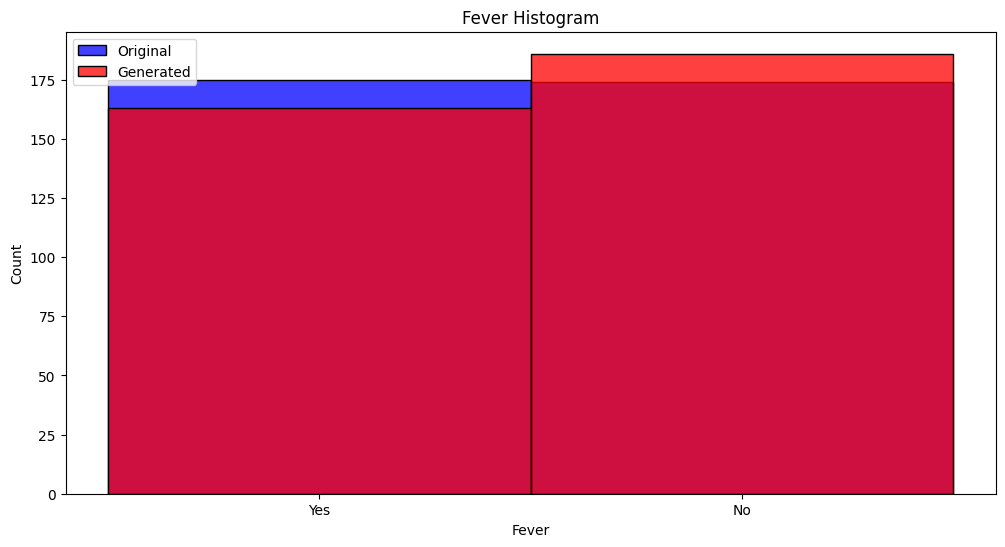

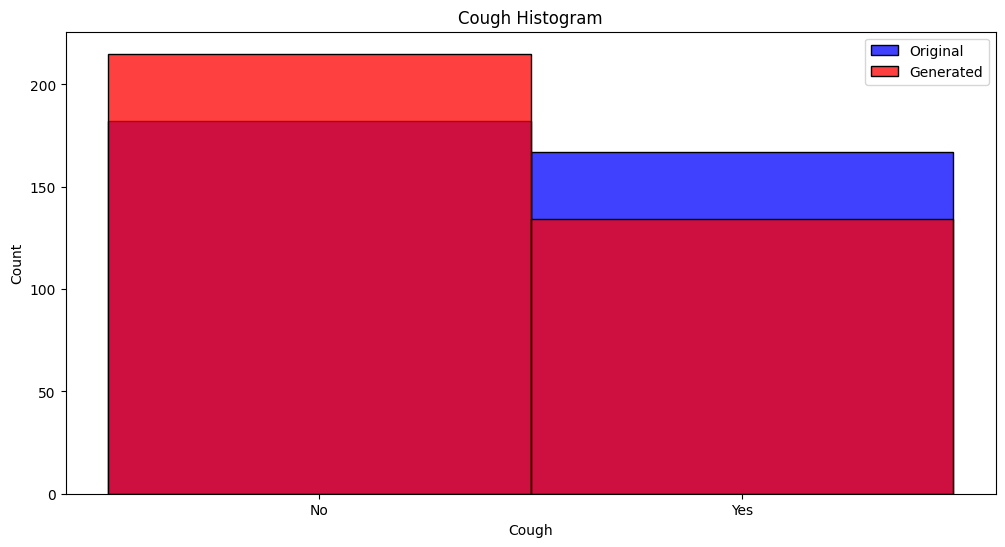

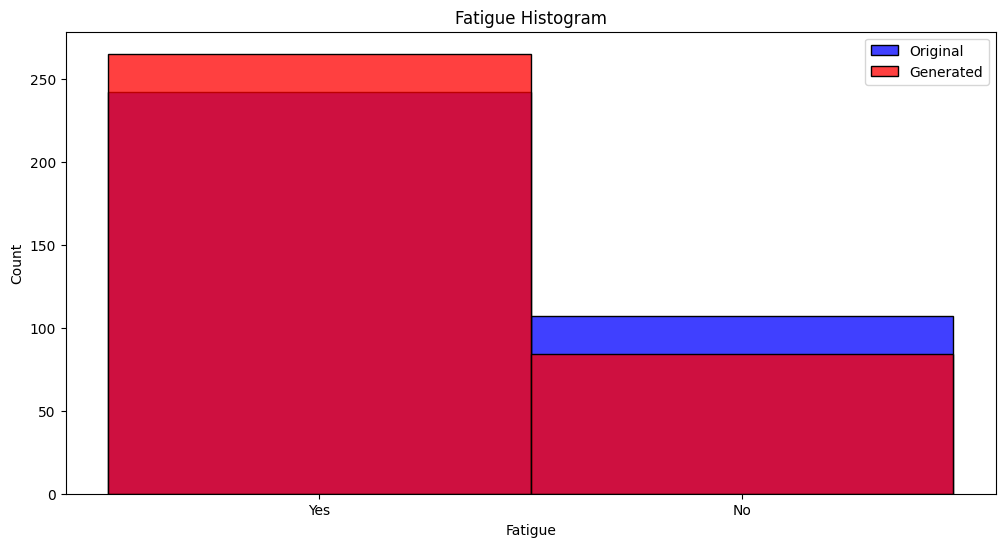

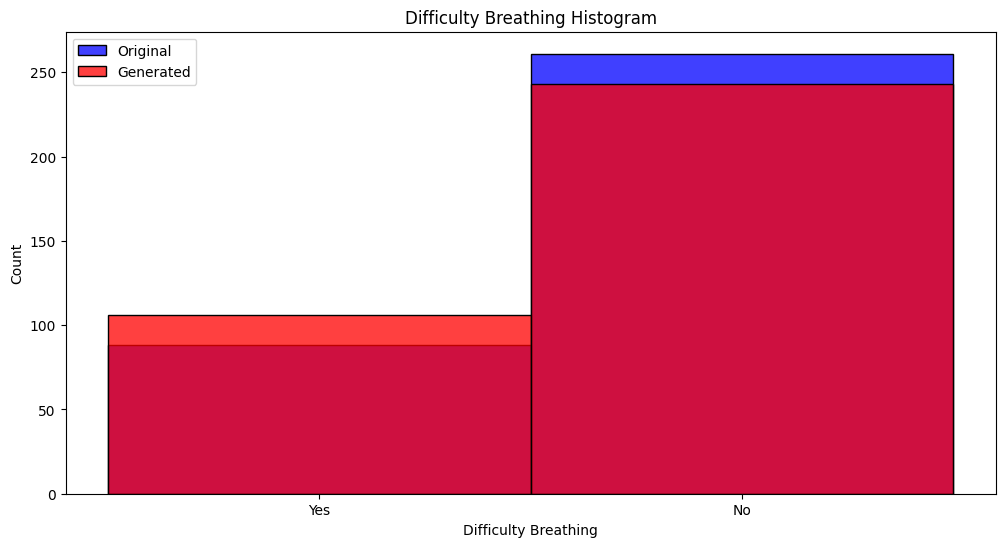

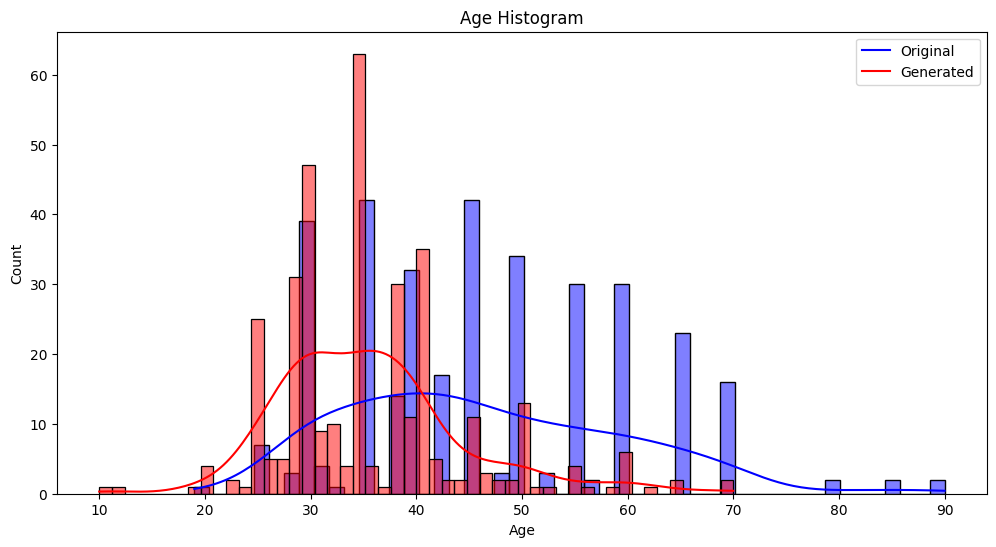

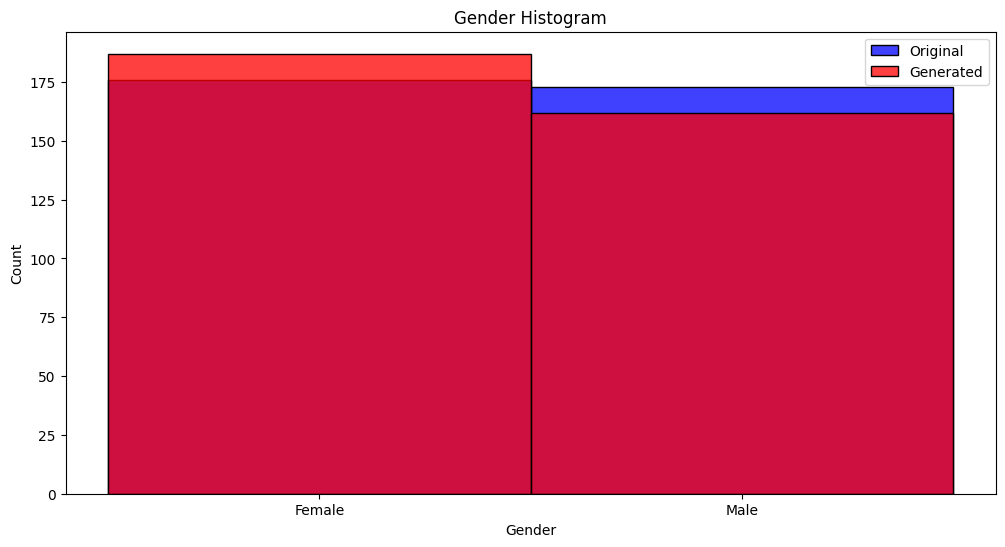

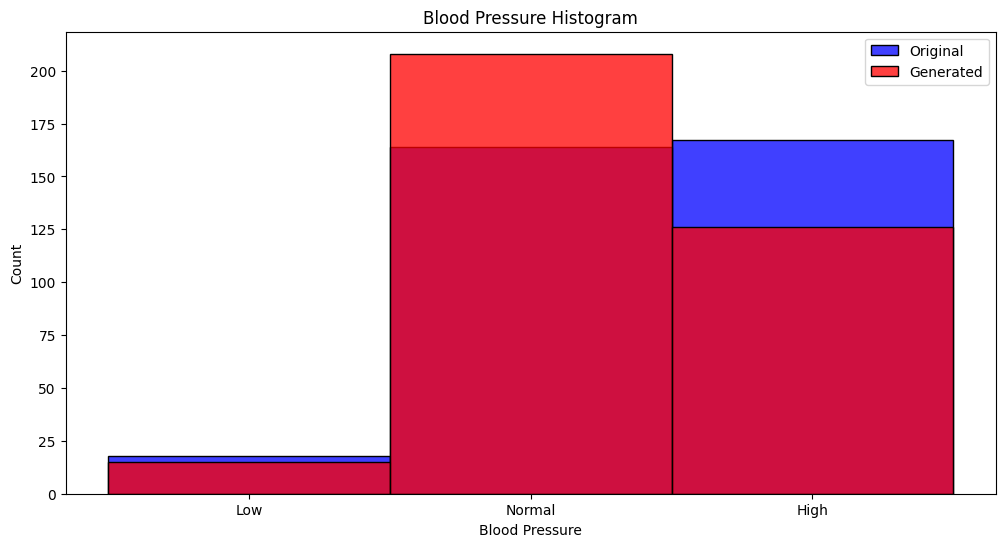

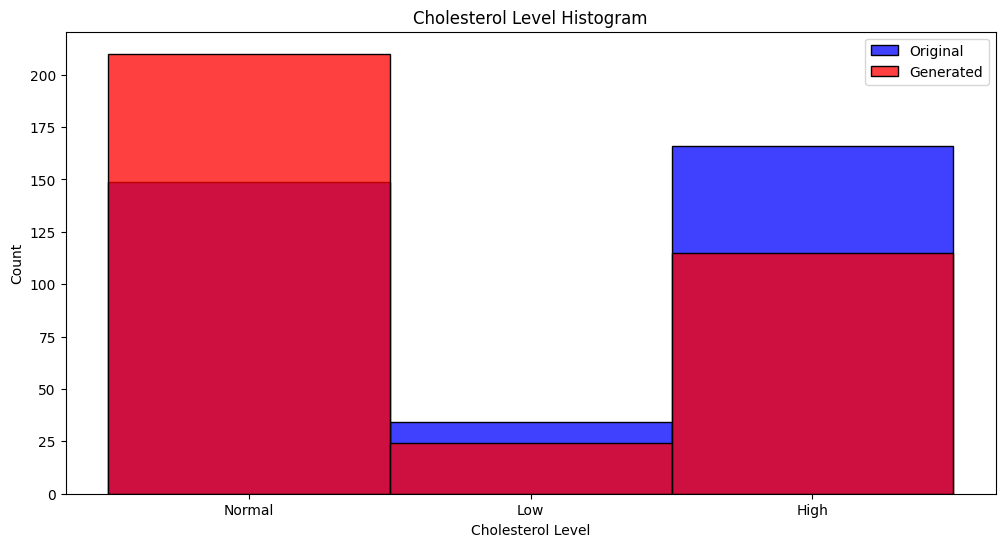

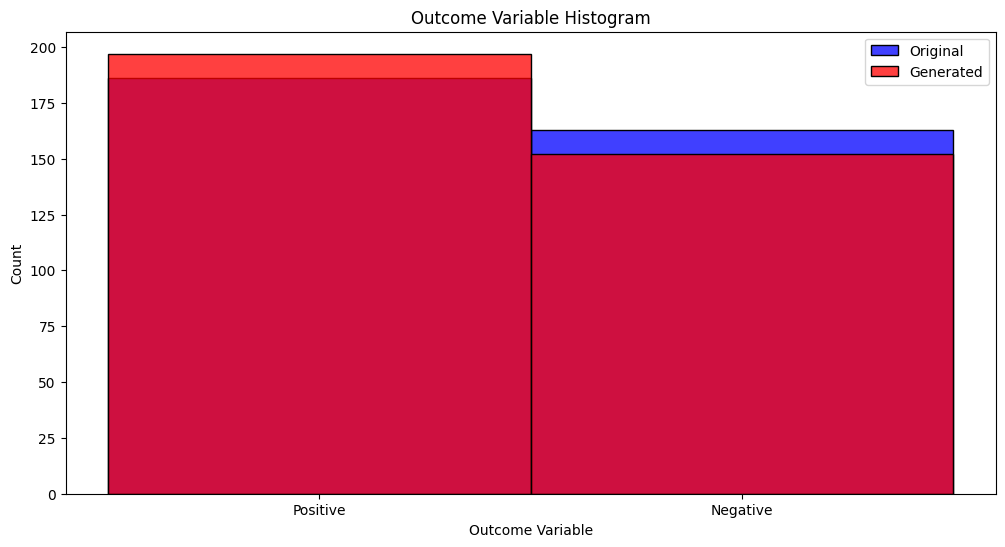

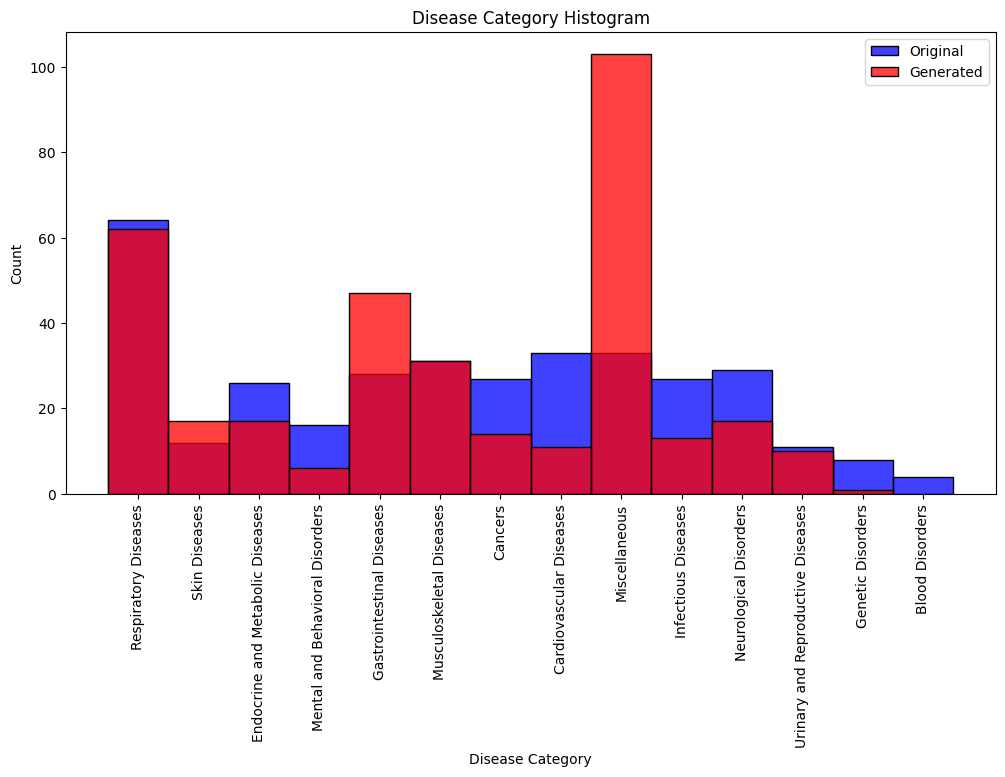

In [10]:
# Plot histograms
for col in original_data.columns:
    # Don't use the 'Disease' column for the histogram instead use the 'Disease Category' column
    if col == 'Disease':
        continue
    plt.figure(figsize=(12, 6))
    if col == 'Age':
        sns.histplot(original_data[col], color='blue', bins=50, kde=True)
        sns.histplot(generated_data[col], color='red', bins=50, kde=True)
    else:
        sns.histplot(original_data[col], color='blue', kde=False)
        sns.histplot(generated_data[col], color='red', kde=False)
    plt.title(f'{col} Histogram')
    plt.legend(['Original', 'Generated'])

    if col == 'Disease Category':
        plt.xticks(rotation=90)
    plt.show()


## Check if the distributions of the original and generated data are the same

In [11]:
# Check if the distributions of the original and generated data are the same
for col in original_data.columns:

    print(f'Feature: {col}')
    ks_stat, p_val = ks_2samp(original_data[col], generated_data[col])
    print(f'KS Statistic: {ks_stat}, p-value: {p_val}')
    if p_val < 0.05:
        print(f'The distributions of the feature {col} are different')
    else:
        print(f'The distributions of the feature {col} are the same')
    print()

Feature: Disease
KS Statistic: 0.045845272206303724, p-value: 0.8574926268517945
The distributions of the feature Disease are the same

Feature: Fever
KS Statistic: 0.034383954154727794, p-value: 0.9862769343135676
The distributions of the feature Fever are the same

Feature: Cough
KS Statistic: 0.09455587392550144, p-value: 0.08826089447254891
The distributions of the feature Cough are the same

Feature: Fatigue
KS Statistic: 0.0659025787965616, p-value: 0.43514415212927254
The distributions of the feature Fatigue are the same

Feature: Difficulty Breathing
KS Statistic: 0.05157593123209169, p-value: 0.7428595199519559
The distributions of the feature Difficulty Breathing are the same

Feature: Age
KS Statistic: 0.42120343839541546, p-value: 3.9414318238437655e-28
The distributions of the feature Age are different

Feature: Gender
KS Statistic: 0.03151862464183381, p-value: 0.9952305643544276
The distributions of the feature Gender are the same

Feature: Blood Pressure
KS Statistic: 0

### TODO: Check again the code below

In [12]:
# Categorical distribution comparison

# Create a new column 'Disease Category' in both datasets
original_data['Disease Category'] = original_data['Disease'].apply(classify_disease)
generated_data['Disease Category'] = generated_data['Disease'].apply(classify_disease)

# Check if the distributions of the original and generated data are the same
print('Disease Category Distribution Comparison:')
print(original_data['Disease Category'].value_counts())
print("\n")
print(generated_data['Disease Category'].value_counts())


Disease Category Distribution Comparison:
Disease Category
Respiratory Diseases                 64
Cardiovascular Diseases              33
Miscellaneous                        33
Musculoskeletal Diseases             31
Neurological Disorders               29
Gastrointestinal Diseases            28
Cancers                              27
Infectious Diseases                  27
Endocrine and Metabolic Diseases     26
Mental and Behavioral Disorders      16
Skin Diseases                        12
Urinary and Reproductive Diseases    11
Genetic Disorders                     8
Blood Disorders                       4
Name: count, dtype: int64


Disease Category
Miscellaneous                        103
Respiratory Diseases                  62
Gastrointestinal Diseases             47
Musculoskeletal Diseases              31
Skin Diseases                         17
Endocrine and Metabolic Diseases      17
Neurological Disorders                17
Cancers                               14
Infectio

KS Statistic: 0.17191977077363896, p-value: 6.388178112224603e-05
The distributions of the Disease Category are different
Chi-square Statistic: 184.15903644294556, p-value: 0.06123703045978472
The distributions of the Disease Category are the same


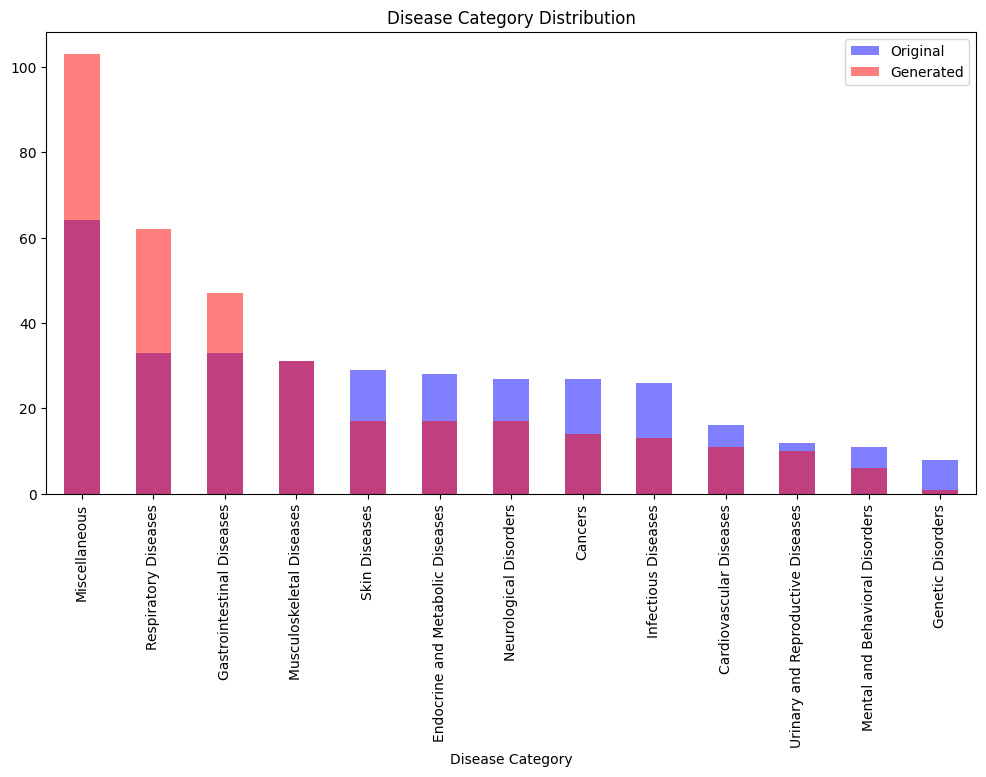

In [13]:
# Kolmogorov-Smirnov test for categorical data
ks_stat, p_val = ks_2samp(original_data['Disease Category'], generated_data['Disease Category'])
print(f'KS Statistic: {ks_stat}, p-value: {p_val}')
if p_val < 0.05:
    print('The distributions of the Disease Category are different')
else:
    print('The distributions of the Disease Category are the same')

# Chi-square test for categorical data
contingency_table = pd.crosstab(original_data['Disease Category'], generated_data['Disease Category'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square Statistic: {chi2}, p-value: {p}')
if p < 0.05:
    print('The distributions of the Disease Category are different')
else:
    print('The distributions of the Disease Category are the same')

# Plot the distribution of the Disease Category bars side by side
plt.figure(figsize=(12, 6))
original_data['Disease Category'].value_counts().plot(kind='bar', color='blue', alpha=0.5)
generated_data['Disease Category'].value_counts().plot(kind='bar', color='red', alpha=0.5)
plt.title('Disease Category Distribution')
plt.legend(['Original', 'Generated'])
plt.xticks(rotation=90)
plt.show()


## Correlation comparison


### One-hot encode the 'Disease Category' column


In [14]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the 'Disease Category' column
encoder = OneHotEncoder()
original_encoded = encoder.fit_transform(original_data[['Disease Category']])
generated_encoded = encoder.transform(generated_data[['Disease Category']])

### Calculate the cosine similarity between the one-hot encoded 'Disease Category' columns


In [15]:
# Calculate the cosine similarity between the one-hot encoded 'Disease Category' columns
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(original_encoded, generated_encoded)
print(f'Cosine Similarity: {cosine_sim.mean()}')

Cosine Similarity: 0.09925205868588928


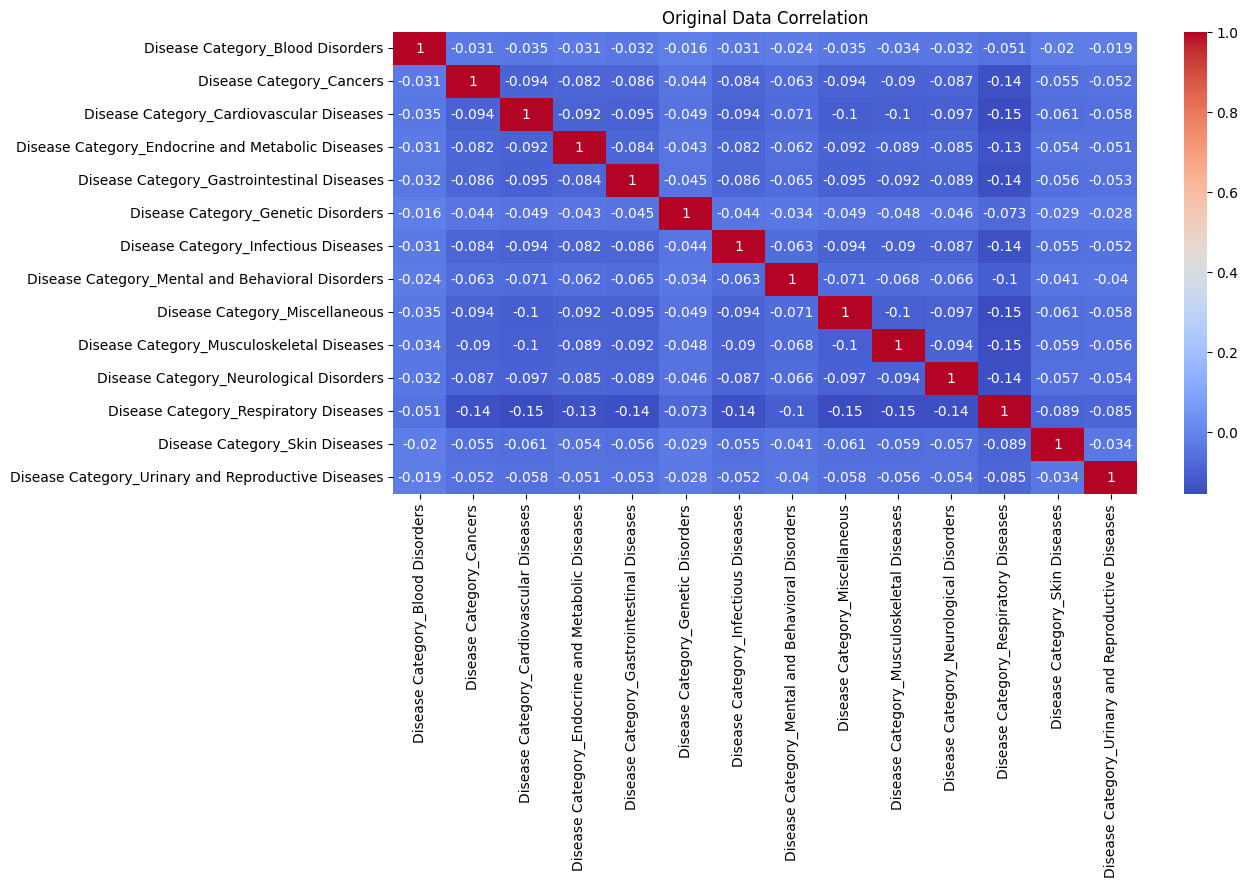

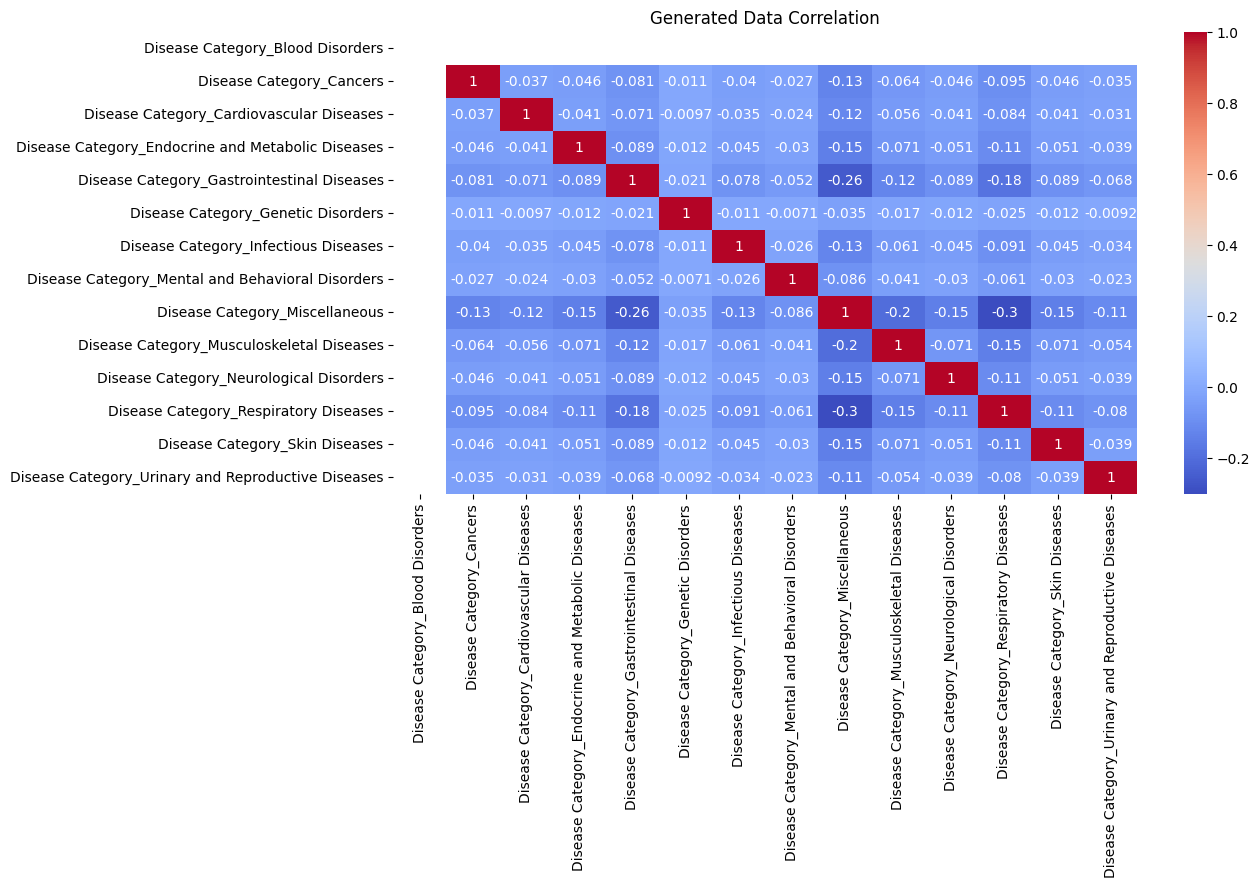

KS Statistic: nan, p-value: nan
The correlation matrices are the same
Chi-square Statistic: 89.4227524487581, p-value: 0.999999925216575
The correlation matrices are the same


In [16]:
# Combine unique disease categories from both datasets
all_disease_categories = np.unique(np.concatenate((original_data['Disease Category'].unique(), generated_data['Disease Category'].unique())))

# One-hot encoding the combined disease categories
encoder = OneHotEncoder(categories=[all_disease_categories])
original_encoded = encoder.fit_transform(original_data[['Disease Category']]).toarray()
generated_encoded = encoder.transform(generated_data[['Disease Category']]).toarray()

# Creating DataFrames from the encoded data
original_encoded_df = pd.DataFrame(original_encoded, columns=encoder.get_feature_names_out(['Disease Category']))
generated_encoded_df = pd.DataFrame(generated_encoded, columns=encoder.get_feature_names_out(['Disease Category']))

# Calculate correlation matrices
original_corr = original_encoded_df.corr()
generated_corr = generated_encoded_df.corr()

# Plot correlation matrices
plt.figure(figsize=(12, 6))
sns.heatmap(original_corr, annot=True, cmap='coolwarm')
plt.title('Original Data Correlation')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(generated_corr, annot=True, cmap='coolwarm')
plt.title('Generated Data Correlation')
plt.show()

# Check if the correlation matrices are the same using KS test
ks_stat, p_val = ks_2samp(original_corr.values.flatten(), generated_corr.values.flatten())
print(f'KS Statistic: {ks_stat}, p-value: {p_val}')
if p_val < 0.05:
    print('The correlation matrices are different')
else:
    print('The correlation matrices are the same')

# Check if the correlation matrices are the same using Chi-square test
chi2, p, dof, expected = chi2_contingency(np.abs(original_corr.values))
print(f'Chi-square Statistic: {chi2}, p-value: {p}')
if p < 0.05:
    print('The correlation matrices are different')
else:
    print('The correlation matrices are the same')

In [17]:
# One-hot encode the 'Disease Category' column
encoder = OneHotEncoder()
original_encoded = encoder.fit_transform(original_data[['Disease Category']])
generated_encoded = encoder.transform(generated_data[['Disease Category']])
original_encoded_df = pd.DataFrame(original_encoded.toarray(), columns=encoder.get_feature_names_out(['Disease Category']))
generated_encoded_df = pd.DataFrame(generated_encoded.toarray(), columns=encoder.get_feature_names_out(['Disease Category']))

# Drop the 'Disease Category' column from the original data
original_data = original_data.drop(columns=['Disease Category', 'Disease'])
generated_data = generated_data.drop(columns=['Disease Category', 'Disease'])

# Join the original data with the one-hot encoded data
original_data_encoded = original_data.join(original_encoded_df)
generated_data_encoded = generated_data.join(generated_encoded_df)

# Calculate the correlation
original_corr = original_data_encoded.corr()
generated_corr = generated_data_encoded.corr()

# Select the correlations with the one-hot encoded 'Disease Category' columns
original_corr = original_corr.loc[:, original_encoded_df.columns]
generated_corr = generated_corr.loc[:, generated_encoded_df.columns]

# Plot the correlation
plt.figure(figsize=(12, 6))
original_corr.mean().plot(kind='bar', color='blue', alpha=0.5)
generated_corr.mean().plot(kind='bar', color='red', alpha=0.5)
plt.title('Correlation with Disease Category')
plt.legend(['Original', 'Generated'])
plt.xticks(rotation=90)
plt.show()

ValueError: could not convert string to float: 'Yes'

### Count of diseases between the two datasets

Original Disease Counts: {'Respiratory Diseases': 501, 'Skin Diseases': 93, 'Endocrine and Metabolic Diseases': 150, 'Mental and Behavioral Disorders': 57, 'Cardiovascular Diseases': 123, 'Gastrointestinal Diseases': 243, 'Cancers': 111, 'Neurological Disorders': 111, 'Musculoskeletal Diseases': 159, 'Infectious Diseases': 111, 'Urinary and Reproductive Diseases': 57, 'Blood Disorders': 12, 'Genetic Disorders': 24, 'Miscellaneous': 18}


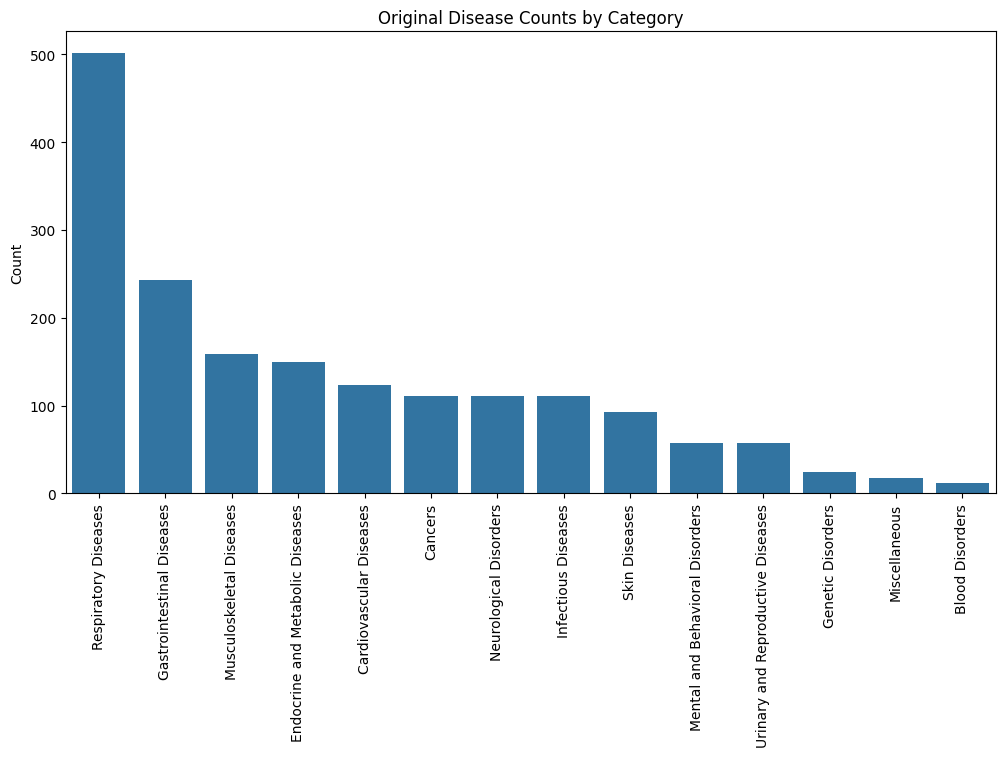

In [ ]:
# Classify the diseases in the original dataset
original_data['Disease Category'] = original_data['Disease'].apply(classify_disease)

# Classify the diseases in the generated dataset
generated_data['Disease Category'] = generated_data['Disease'].apply(classify_disease)

# Print the counts of diseases in each category
print('Original Disease Counts:', categories_count)

# Plot the counts of diseases in each category and order by number of counts
plt.figure(figsize=(12, 6))
sns.barplot(x=list(categories_count.keys()), y=list(categories_count.values()), order=sorted(categories_count, key=categories_count.get, reverse=True))
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Original Disease Counts by Category')
plt.show()


### Calculate the chi-square statistic and p-value for the disease categories


In [ ]:
# Calculate the chi-square statistic and p-value for the disease categories
chi2_stat, p_val, _, _ = chi2_contingency(
    pd.crosstab(original_data['Disease Category'], generated_data['Disease Category'])
)

# Print the chi-square statistic and p-value
print('Chi-Square Statistic:', chi2_stat)
print('P-Value:', p_val)

Chi-Square Statistic: 156.16537019802917
P-Value: 0.2133239942303504


### Calculate the Kolmogorov-Smirnov statistic and p-value for the disease categories


KS Statistic: 0.39285714285714285
P-Value: 0.2058202263478882


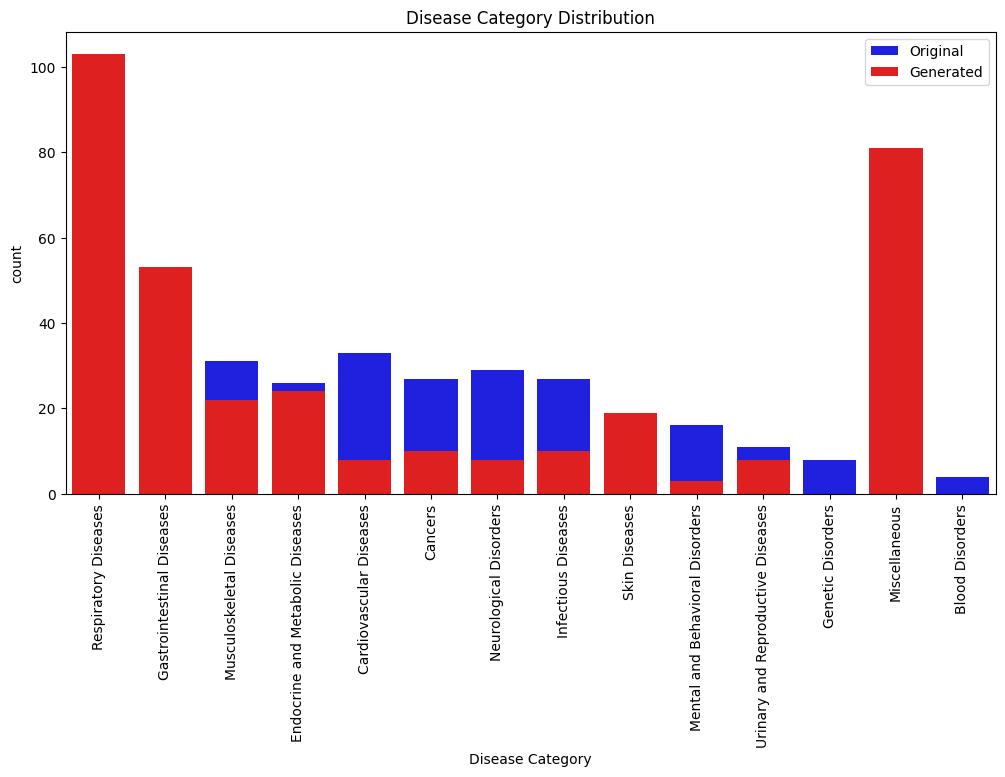

In [ ]:
# Calculate the Kolmogorov-Smirnov statistic and p-value for the disease categories

ks_stat, p_val = ks_2samp(
    original_data['Disease Category'].value_counts(normalize=True),
    generated_data['Disease Category'].value_counts(normalize=True)
)

# Print the Kolmogorov-Smirnov statistic and p-value
print('KS Statistic:', ks_stat)
print('P-Value:', p_val)

# Plot the distribution of disease categories in the original and generated datasets and order by number of counts
plt.figure(figsize=(12, 6))
sns.countplot(x='Disease Category', data=original_data, color='blue', order=sorted(categories_count, key=categories_count.get, reverse=True))
sns.countplot(x='Disease Category', data=generated_data, color='red', order=sorted(categories_count, key=categories_count.get, reverse=True))
plt.xticks(rotation=90)
plt.title('Disease Category Distribution')
plt.legend(['Original', 'Generated'])
plt.show()

# Dimensionality Reduction and Visualization


## T-SNE Visualisation

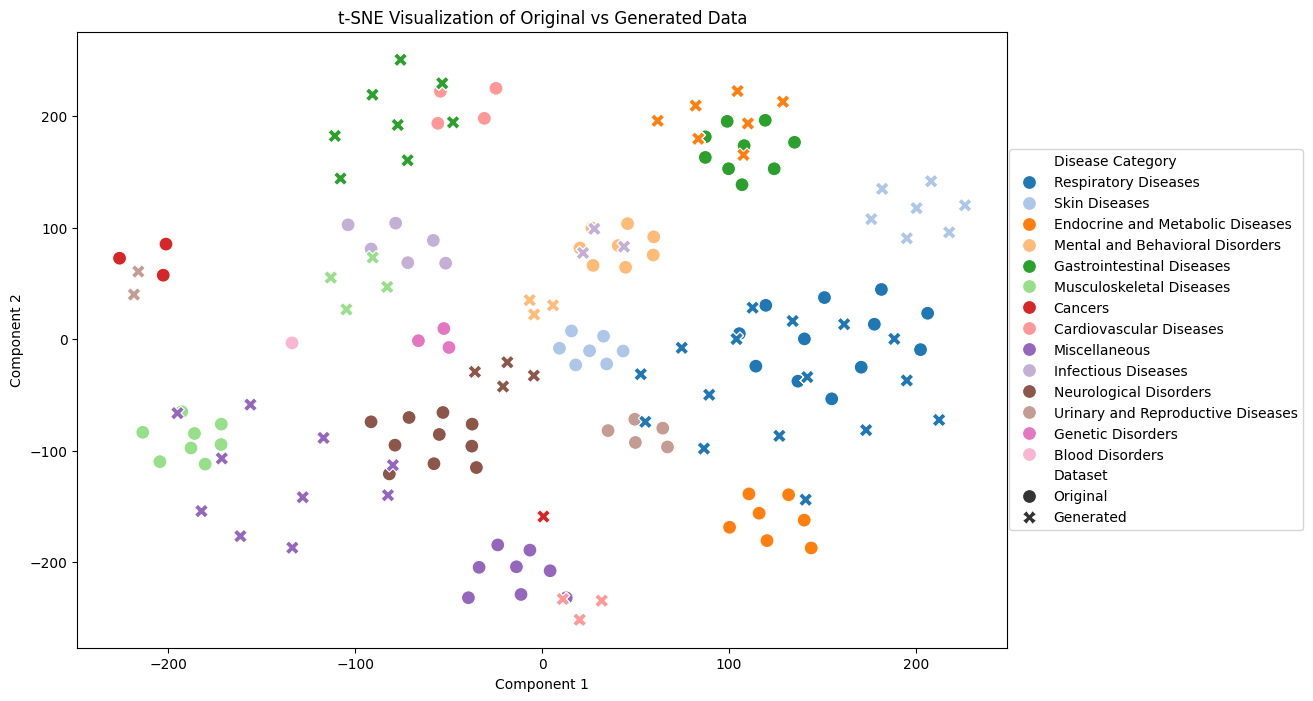

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder

# Assuming original_data and generated_data are your datasets

# One-hot encode the 'Disease Category' column
encoder = OneHotEncoder()
original_encoded = encoder.fit_transform(original_data[['Disease Category']])
generated_encoded = encoder.transform(generated_data[['Disease Category']])
original_encoded = original_encoded.toarray()
generated_encoded = generated_encoded.toarray()

# Perform t-SNE on the one-hot encoded data
tsne = TSNE(n_components=2, random_state=42)
original_tsne = tsne.fit_transform(original_encoded)
generated_tsne = tsne.fit_transform(generated_encoded)

# Create a combined DataFrame for easier plotting
import pandas as pd
original_df = pd.DataFrame(original_tsne, columns=['Component 1', 'Component 2'])
original_df['Dataset'] = 'Original'
original_df['Disease Category'] = original_data['Disease Category']

generated_df = pd.DataFrame(generated_tsne, columns=['Component 1', 'Component 2'])
generated_df['Dataset'] = 'Generated'
generated_df['Disease Category'] = generated_data['Disease Category']

combined_df = pd.concat([original_df, generated_df])

# Plot the t-SNE visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue='Disease Category', style='Dataset', palette='tab20', data=combined_df, markers=True, s=100)
plt.title('t-SNE Visualization of Original vs Generated Data')
# make the legend smaller
plt.legend(loc='center', bbox_to_anchor=(1.16, 0.5), ncol=1)
plt.show()


## PCA

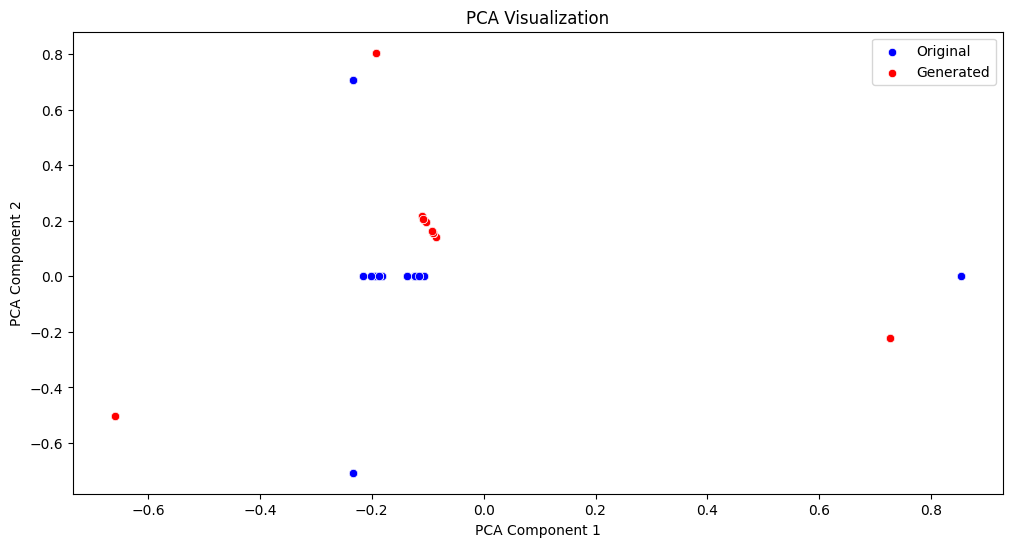

In [ ]:
# Principal Component Analysis (PCA) Visualisation
from sklearn.decomposition import PCA

# Perform PCA on the one-hot encoded data
pca = PCA(n_components=2)
original_pca = pca.fit_transform(original_encoded)
generated_pca = pca.fit_transform(generated_encoded)

# Plot the PCA visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x=original_pca[:, 0], y=original_pca[:, 1], color='blue')
sns.scatterplot(x=generated_pca[:, 0], y=generated_pca[:, 1], color='red')
plt.title('PCA Visualization')
plt.legend(['Original', 'Generated'])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

